# Problem Setting: Maze Solving

This notebook demonstrates a simple maze solving algorithm based on Deep Q-Learning. According to the Reinforcement learning theory, the Q-Learning algorithm allow the agent to search the goal in 2D maze map. The agent can search and learn by the reward values in each point.

In relation to reinforcement learning theory, the state of agent is 2D position coordinates and the action is to dicide the direction of movement. Within the wall, the agent is movable in a cross direction and can advance by one point at a time. After moving into a new position, the agent can obtain a reward. On greedy searching, this extrinsically motivated agent performs in order to obtain some reward as high as possible. Each reward value is plot in map.

The map data that agent will observe is as follow.

$$\boldsymbol{M}_{reward} =
\begin{pmatrix}
r_{1,1} & \cdots & r_{1,j} & \cdots & r_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
r_{i,1} &        & r_{i,j} & \cdots & r_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
r_{n,1} & \cdots & r_{n,j} & \cdots & r_{n,m}
\end{pmatrix}
$$

where $(i, j)$ is tuple of 2D position coordinates in the maze map. Then $r_{i,j}$ is reward value that the agent can get by arriving the point: $(i, j)$. This notebook defines the reward function as follows

$$r_{i, j} = 1.0 - \sqrt{(i - G_i)^2 + (j - G_j)^2} - \mathcal{P}_{repeating}$$

where $(G_i, G_j)$ is the tuple of goal point and $\mathcal{P}_{repeating}$ is a penalty point in the case that the agent will revisit points that the agent have already reached. If the agent reaches the goal, the reward is $1.0$. This will be maximum reward.

The state of agent is $s_{i,j}$. In this case, the form of agent's state transition matrix is designed to correspond with $\boldsymbol{M}_{reward}$ as follow.

$$\boldsymbol{M}_{state} =
\begin{pmatrix}
s_{1,1} & \cdots & s_{1,j} & \cdots & s_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
s_{i,1} &        & s_{i,j} & \cdots & s_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
s_{n,1} & \cdots & s_{n,j} & \cdots & s_{n,m}
\end{pmatrix}
$$

The possible actions of agent can be limited by $s_{i,j}$. Agent can select adjacent elements in $\boldsymbol{M}_{state}$.

So in this problem setting, the maze map data can be as generated below in detail.

## Problem solution: Q-Learning algorithm.

This notebook considers problem setteing in which an agent interacts with an environment $\mathcal{E}$, in this case the Maze solving, in a sequence of actions, observations and rewards. At each time-step the agent selects an action at from the set of legal game actions, 

$$\boldsymbol{M}_{action} =
\begin{pmatrix}
a_{1,1} & \cdots & a_{1,j} & \cdots & a_{1,m} \\
\vdots & \ddots &        &        & \vdots \\
a_{i,1} &        & a_{i,j} & \cdots & a_{i,m} \\
\vdots &        &        & \ddots & \vdots \\
a_{n,1} & \cdots & a_{n,j} & \cdots & a_{n,m}
\end{pmatrix}
$$.

$\boldsymbol{M}_{state}$, $\boldsymbol{M}_{action}$, and $\boldsymbol{M}_{reward}$ can be assembled as a matrix of rank-3 of 3 channels and considered as a feature points which will be observed by the agent. The state/action-value function is as follows

$$Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$$

The goal of the agent is to interact with the Maze map by selecting actions in a way that maximises future rewards. We can make the standard assumption that future rewards are discounted by a factor of $\gamma$ per time-step, and define the future discounted return at time $t$ as $R_t = \sum_{t'=t}^{T}\gamma^{t'-t}r_{t'}$
, where $T$ is the time-step at which the agent will reach the goal. This notebook defines the optimal state/action-value function $Q^{\ast}(s, a) = Q^{\ast}(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$ as the maximum expected return achievable by following any strategy, after seeing some state $s$ and then taking some action $a$, $Q^{\ast}(s, a) = \max \pi \mathbb{E}[R_t \mid s_t = s, a_t = a, \pi ]$, where $\pi$ is a policy mapping sequences to actions (or distributions over actions).

The optimal state/action-value function obeys an important identity known as the Bellman equation. This is based on the following *intuition*: if the optimal value $Q^{\ast}(s', a')$ of the sequence $s'$ at the next time-step was known for all possible actions $a'$ , then the optimal strategy is to select the action $a'$ maximising the expected value of $r + \gamma Q^{\ast}(s', a')$, 

$$Q^{\ast}(s', a') = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q^{\ast}(s', a')\mid s, a]$$

The basic idea behind many reinforcement learning algorithms is to estimate the state/action-value function, by using the Bellman equation as an iterative update,

$$Q_{i+1}(s, a) = \mathbb{E}[r + \gamma \max_{a'}Q_i(s', a') \mid s, a]$$.

Such *value iteration algorithms* converge to the optimal state/action-value function, $Q_i \rightarrow Q^{\ast}$ as $i \rightarrow \infty$. In practice, this basic approach is totally impractical, because the state/action-value function is estimated separately for each sequence, without any **generalisation**. Instead, it is common to use a **function approximator** to estimate the state/action-value function,

$$Q(s, a; \theta) \approx Q^{\ast}(s, a)$$

# Problem re-setting: Generalisation, or a function approximation.

The Reinforcement learning theory presents several issues from a perspective of deep learning theory. Firstly, deep learning applications have required large amounts of handlabelled training data. Reinforcement learning algorithms, on the other hand, must be able to learn from a scalar reward signal that is frequently sparse, noisy and delayed.

The difference between the two theories is not only the type of data but also the timing to be observed. The delay between taking actions and receiving rewards, which can be thousands of timesteps long, seems particularly daunting when compared to the direct association between inputs and targets found in supervised learning. 

Another issue is that most deep learning algorithms assume the data samples to be independent, while in reinforcement learning one typically encounters sequences of highly correlated states. Furthermore, in Reinforcement learning the data distribution changes as the algorithm learns new behaviours, which can be problematic for deep learning methods that assume a fixed underlying distribution.

## Problem solution: Deep Q-Network.

In this problem setting, the function of nerual network or deep learning is a function approximation with weights $\theta$ as a Q-Network. A Q-Network can be trained by minimising a loss functions $L_i(\theta_i)$ that changes at each iteration $i$,

$$L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot)}[y_i - Q(s, a, \theta_i)]^2$$

where $y_i = \mathbb{E}_{s' \sim \mathcal{E}}[r + \gamma \max_{a'} Q(s', a', \theta_{i-1}) \mid s, a]$ is the target for iteration $i$ and $\rho(\cdot)$ is a so-called behaviour distribution. This is probability distribution over states and actions. The parameters from the previous iteration $\theta_{i−1}$ are held fixed when optimising the loss function $L_i(\theta_i)$. Differentiating the loss function
with respect to the weights we arrive at the following gradient,

$$\nabla_{\theta_i}L_i(\theta_i) = \mathbb{E}_{s, a \sim \rho(\cdot);s' \sim \mathcal{E}}\left[\left(r + \gamma \max_{a'} Q(s', a'; \theta_{i-1}) - Q(s, a; \theta_i)\right)\nabla_{\theta_i}Q(s, a; \theta)\right]$$.

Because of computational complexity with high rank matrix: $Q(s, a) = Q(\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward})$, this notebook adopts a **Deep convolutional neural networks(Deep CNNs)** and implements with library: [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) which is Python library for building the CNNs.

To simplify expression, the output from the Deep CNNs as a function approximator is an affine transformation is as follows

$$y'_i = F_{activate}\left((\boldsymbol{M}_{state}, \boldsymbol{M}_{action}, \boldsymbol{M}_{reward}) \ast W_{\theta_{i}} + \vec{b}\right)$$

where $\ast$ is a convolution operator. $W_{\theta_{i}}$ is weight matrix in CNNs and $\vec{b}$ is a bias vector. And $F_{activate}$ is an activation function such as Logistic function, Tanh function, or ReLu function.

### Import modules and instantiate objects.

Import Python and Cython modules from [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) and [pyqlearning](https://github.com/chimera0/accel-brain-code/tree/master/Reinforcement-Learning) and instantiate objects.

In [1]:
# First convolution layer.
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer1
# Second convolution layer.
from pydbm.cnn.layerablecnn.convolution_layer import ConvolutionLayer as ConvolutionLayer2
# Computation graph for first convolution layer.
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph1
# Computation graph for second convolution layer.
from pydbm.synapse.cnn_graph import CNNGraph as ConvGraph2
# Logistic Function as activation function.
from pydbm.activation.logistic_function import LogisticFunction
# Tanh Function as activation function.
from pydbm.activation.tanh_function import TanhFunction
# ReLu Function as activation function.
from pydbm.activation.relu_function import ReLuFunction
# CNN as a Function Approximator.
from pyqlearning.functionapproximator.cnn_fa import CNNFA
# Deep Q-Network to solve Maze Problem.
from demo_maze_deep_q_network import MazeDeepQNetwork

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_size = 4

# First convolution layer.
conv1 = ConvolutionLayer1(
    # Computation graph for first convolution layer.
    ConvGraph1(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=3,
        # The size of kernel.
        kernel_size=6,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=2,
        # The number of zero-padding.
        pad=2
    )
)
# Second convolution layer.
conv2 = ConvolutionLayer2(
    # Computation graph for second convolution layer.
    ConvGraph2(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=batch_size,
        # The size of kernel.
        kernel_size=3,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=1,
        # The number of zero-padding.
        pad=1
    )
)

# Stack.
layerable_cnn_list=[
    conv1, 
    conv2
]

In [4]:
# CNN as a function approximator.
function_approximator = CNNFA(
    # Batch size.
    batch_size=batch_size,
    # Stacked CNNs.
    layerable_cnn_list=layerable_cnn_list,
    # Learning rate.
    learning_rate=1e-05,
    # is-a `pydbm.loss.interface.computable_loss.ComputableLoss`.
    computable_loss=None,
    # is-a `pydbm.optimization.opt_params.OptParams`.
    opt_params=None,
    # is-a `pydbm.verification.interface.verificatable_result.VerificatableResult`.
    verificatable_result=None,
    # is-a `pydbm.activation.interface.activation_function.ActivationFunction`.
    fc_activation_function=TanhFunction(),
    # Verbose mode or not.
    verbose_mode=True
)

Setup CNN layers and the parameters.


### Setup hyperparameters.

The function of `MazeDeepQNetwork`, which is-a `DeepQLearning`, is to solve Maze problem with Deep Q-Network. This object can be delegated `FunctionApproximator` and received hyperparameters.

In [5]:
deep_q_learning = MazeDeepQNetwork(
    # is-a `FunctionApproximator`.
    function_approximator,
    # Map size.
    map_size=(10, 10),
    # The length of short-term memory.
    # The agent excludes routes that have passed even once in the past 
    # for this number of steps from action choices.
    memory_num=100,
    # Penalties arising when passing through a route
    # once passed even once in the past.
    repeating_penalty=1.0
)
# Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Learning rate.
deep_q_learning.alpha_value = 1e-05
# Discounting rate.
deep_q_learning.gamma_value = 0.01

### Visualize map.

Before executing `MazeDeepQNetwork.__init__()`, `MazeDeepQNetwork` created a map at random and has `np.ndarray` of the data as `MazeDeepQNetwork.map_arr`.

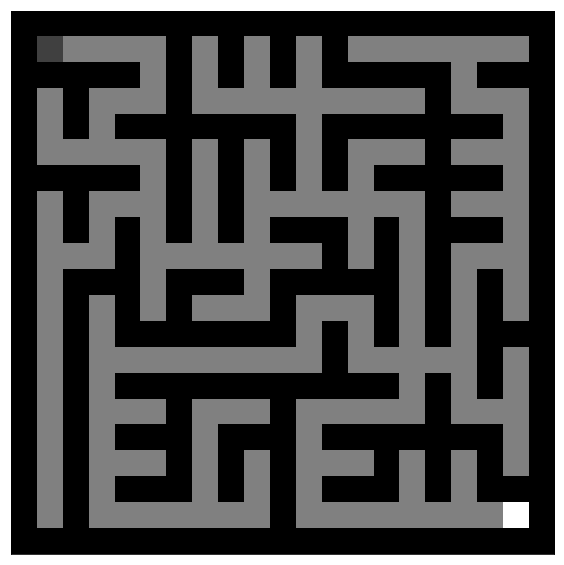

In [6]:
_ = plt.figure(figsize=(10, 10))
plt.imshow(deep_q_learning.map_arr, cmap="gray")
plt.tick_params(labelbottom="off",bottom="off")
plt.tick_params(labelleft="off",left="off")
plt.show()
plt.close()

- Black squares represent a wall.
- Light gray squares represent passages.
- A dark gray square represents a start point.
- A white squeare represents a goal point.

### Schedule the learning.

Determine the number of learning and the number of searches.

In [7]:
# The number of game.
game_n = 5

# Initial state.
init_state_arr = deep_q_learning.extract_now_state().copy()

goal_n = 0
total_n = 0
for _ in range(game_n):
    try:
        # Execute learning.
        deep_q_learning.learn(
            # Initial state.
            state_arr=init_state_arr,
            # The number of searching.
            limit=5000
        )
        # Goal or not ?
        if deep_q_learning.check_the_end_flag(deep_q_learning.extract_now_state()) is True:
            goal_n += 1
        total_n += 1

        # Reset time step.
        deep_q_learning.t = 1
    except KeyboardInterrupt:
        print("Interrupt.")
    print("Goal rate: " + str(goal_n) + "/" + str(total_n) + " = " + str(goal_n / total_n))
print("Goal rate: " + str(goal_n / total_n))

Goal rate: 1/1 = 1.0
Goal rate: 2/2 = 1.0
Goal rate: 2/3 = 0.6666666666666666
Goal rate: 3/4 = 0.75
Goal rate: 4/5 = 0.8
Goal rate: 0.8


### Visualize learning logs.

Check the difference between inferneced Q-Values and real observed Q-Values.

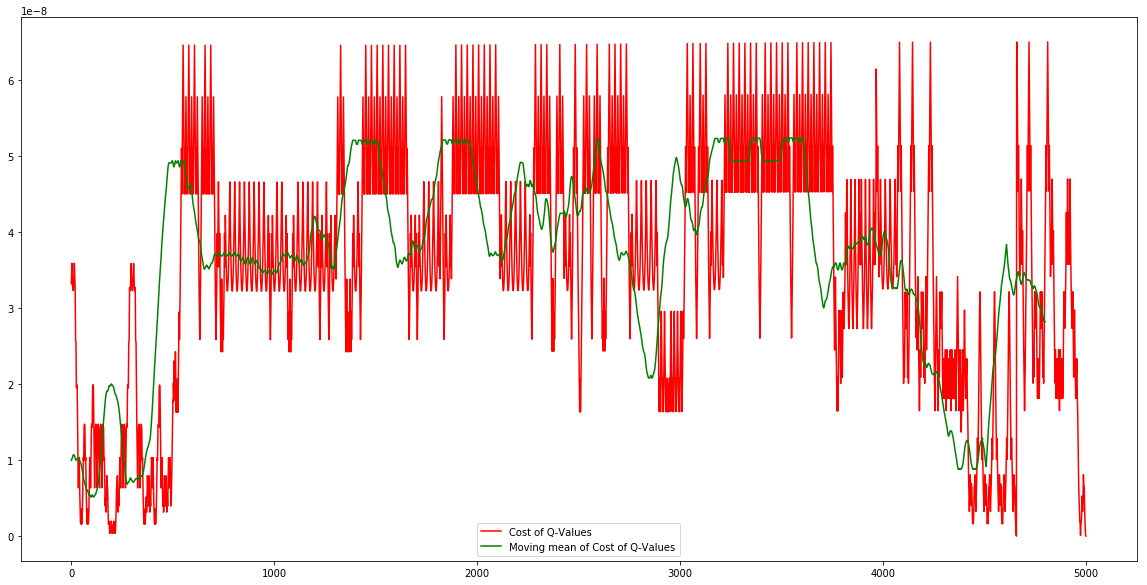

In [8]:
import pandas as pd
df = pd.DataFrame(function_approximator.q_logs_list, columns=["q", "real_q", "cost"])

num = 100
b = np.ones(num)/num

q_cost_arr = np.convolve(df.cost.values[-5000:], b, mode="same")[num:-num]
q_c_arr = np.convolve(df.q.values[-5000:], b, mode='same')[num:-num]
real_q_c_arr = np.convolve(df.real_q.values[-5000:], b, mode='same')[num:-num]

plt.figure(figsize=(20, 10))
plt.plot(df.cost.values[-5000:], label="Cost of Q-Values", color="red")
plt.plot(q_cost_arr, label="Moving mean of Cost of Q-Values", color="green")
plt.legend()
plt.show()
plt.close()

### Inference the routes.

After learning, `MazeDeepQNetwork` can provide a method `inference` for infernecing the routes.

In [26]:
# Reset Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.9
# Reset time step.
deep_q_learning.t = 1
# Inference the routes.
route_list = deep_q_learning.inference(
    state_arr=init_state_arr,
    limit=500
)

In [27]:
result_df = pd.DataFrame(route_list, columns=["x", "y", "q_value"])
result_df.shape

(169, 3)

In [28]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/monotype/garamond.ttf", 16)

img_list = []

for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = deep_q_learning.map_arr.copy()
    now_map_arr[x, y] = 2
    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)

img_list[0].save(
    'img/DQN_agent_demo.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=0
)


<a href="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_single_agent_goal_compressed.gif" target="_blank"><img src="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_single_agent_goal_compressed.gif"></a>

# Problem Setting: The pursuit-evasion game

Expanding the search problem of the maze makes it possible to describe the pursuit-evasion game that  is a family of problems in mathematics and computer science in which one group attempts to track down members of another group in an environment.

## Problem solution: Re-entry the Deep Q-Network

This problem can be re-described as the multi-agent control problem, which involves decomposing the global system state into an image like representation with information encoded in separate channels. This reformulation allows us to use convolutional neural networks to efficiently extract important features from the image-like state.

Gupta, J. K. et al.(2017) proposed new algorithm which uses the image-like state representation of the multi-agent system as an input, and outputs the estimated Q-values for the agent in question. They described a number of implementation contributions that make training efficient and allow agents to learn directly from the behavior of other agents in the system.

### Import modules and instantiate objects.

Import Python and Cython modules from [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) and [pyqlearning](https://github.com/chimera0/accel-brain-code/tree/master/Reinforcement-Learning) and instantiate objects.

In [3]:
# Deep Q-Network to solve Maze Problem.
from demo_maze_multi_agent_deep_q_network import MazeMultiAgentDeepQNetwork

In [4]:
# The number of enemies.
enemy_num = 3
# Batch size.
batch_size = 4
# Channel.
channel = 3 + enemy_num

# First convolution layer.
conv1 = ConvolutionLayer1(
    # Computation graph for first convolution layer.
    ConvGraph1(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=channel,
        # The size of kernel.
        kernel_size=6,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=2,
        # The number of zero-padding.
        pad=2
    )
)
# Second convolution layer.
conv2 = ConvolutionLayer2(
    # Computation graph for second convolution layer.
    ConvGraph2(
        # Logistic function as activation function.
        activation_function=TanhFunction(),
        # The number of `filter`.
        filter_num=batch_size,
        # The number of channel.
        channel=batch_size,
        # The size of kernel.
        kernel_size=3,
        # The filter scale.
        scale=0.001,
        # The nubmer of stride.
        stride=1,
        # The number of zero-padding.
        pad=1
    )
)

# Stack.
layerable_cnn_list=[
    conv1, 
    conv2
]

In [5]:
# CNN as a function approximator.
function_approximator = CNNFA(
    # Batch size.
    batch_size=batch_size,
    # Stacked CNNs.
    layerable_cnn_list=layerable_cnn_list,
    # Learning rate.
    learning_rate=1e-05,
    # is-a `pydbm.loss.interface.computable_loss.ComputableLoss`.
    computable_loss=None,
    # is-a `pydbm.optimization.opt_params.OptParams`.
    opt_params=None,
    # is-a `pydbm.verification.interface.verificatable_result.VerificatableResult`.
    verificatable_result=None,
    # is-a `pydbm.activation.interface.activation_function.ActivationFunction`.
    fc_activation_function=TanhFunction(),
    # Verbose mode or not.
    verbose_mode=True
)

Setup CNN layers and the parameters.


In [6]:
deep_q_learning = MazeMultiAgentDeepQNetwork(
    # is-a `FunctionApproximator`.
    function_approximator,
    # Map size.
    map_size=(10, 10),
    # The length of short-term memory.
    # The agent excludes routes that have passed even once in the past 
    # for this number of steps from action choices.
    memory_num=50,
    # Penalties arising when passing through a route
    # once passed even once in the past.
    repeating_penalty=1.0,
    # The number of enemies.
    enemy_num=enemy_num,
    # Minimum euclid distance of initial position of agent and enemies.
    enemy_init_dist=10
)
# Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Learning rate.
deep_q_learning.alpha_value = 1e-05
# Discounting rate.
deep_q_learning.gamma_value = 0.01

Enemy0: (9, 13)
Enemy1: (7, 17)
Enemy2: (3, 14)


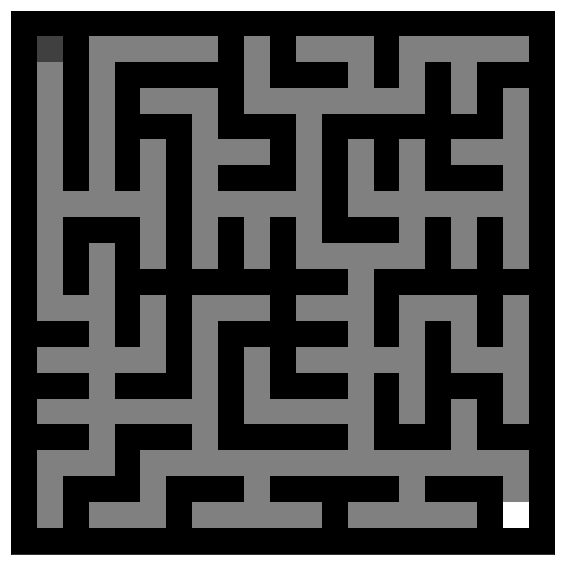

In [7]:
_ = plt.figure(figsize=(10, 10))
plt.imshow(deep_q_learning.map_arr, cmap="gray")
plt.tick_params(labelbottom="off",bottom="off")
plt.tick_params(labelleft="off",left="off")
plt.show()
plt.close()

In [8]:
# Initial state.
init_state_arr = deep_q_learning.extract_now_state().copy()

In [9]:
# The number of game.
game_n = 10

init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

goal_n = 0
crash_n = 0
total_n = 0
timeup_n = 0
for _ in range(game_n):
    try:
        # Execute learning.
        deep_q_learning.learn(
            # Initial state.
            state_arr=init_state_arr,
            # The number of searching.
            limit=5000
        )
        # Goal or not ?
        if deep_q_learning.END_STATE == "Crash":
            crash_n += 1
        elif deep_q_learning.END_STATE == "Goal":
            goal_n += 1
        else:
            timeup_n += 1
        total_n += 1

        # Reset time step.
        deep_q_learning.t = 1
    except KeyboardInterrupt:
        print("Interrupt.")
    deep_q_learning.create_enemy()
    print("Crash rate: " + str(crash_n) + "/" + str(total_n) + " = " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n) + "/" + str(total_n) + " = " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n) + "/" + str(total_n) + " = " + str(goal_n / total_n))

if total_n > 0:
    print("Crash rate: " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n / total_n))

Enemy0: (13, 7)
Enemy1: (15, 7)
Enemy2: (16, 17)
Crash rate: 1/1 = 1.0
Timeup rate: 0/1 = 0.0
Goal rate:  0/1 = 0.0
Enemy0: (7, 19)
Enemy1: (12, 5)
Enemy2: (17, 17)
Crash rate: 2/2 = 1.0
Timeup rate: 0/2 = 0.0
Goal rate:  0/2 = 0.0
Enemy0: (9, 11)
Enemy1: (16, 17)
Enemy2: (7, 15)
Crash rate: 3/3 = 1.0
Timeup rate: 0/3 = 0.0
Goal rate:  0/3 = 0.0
Enemy0: (11, 16)
Enemy1: (4, 11)
Enemy2: (19, 7)
Crash rate: 4/4 = 1.0
Timeup rate: 0/4 = 0.0
Goal rate:  0/4 = 0.0
Enemy0: (5, 15)
Enemy1: (5, 18)
Enemy2: (16, 17)
Crash rate: 5/5 = 1.0
Timeup rate: 0/5 = 0.0
Goal rate:  0/5 = 0.0
Enemy0: (13, 14)
Enemy1: (17, 13)
Enemy2: (2, 17)
Crash rate: 5/6 = 0.8333333333333334
Timeup rate: 0/6 = 0.0
Goal rate:  1/6 = 0.16666666666666666
Enemy0: (1, 13)
Enemy1: (15, 2)
Enemy2: (18, 15)
Crash rate: 6/7 = 0.8571428571428571
Timeup rate: 0/7 = 0.0
Goal rate:  1/7 = 0.14285714285714285
Enemy0: (15, 15)
Enemy1: (1, 16)
Enemy2: (19, 4)
Crash rate: 7/8 = 0.875
Timeup rate: 0/8 = 0.0
Goal rate:  1/8 = 0.125
Enemy

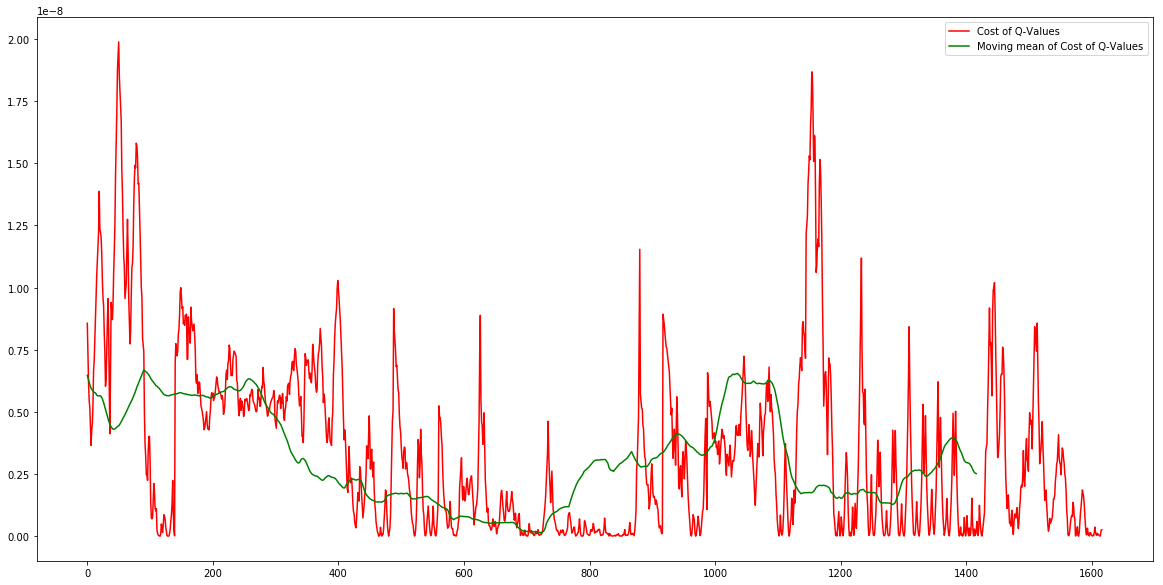

In [10]:
import pandas as pd
df = pd.DataFrame(function_approximator.q_logs_list, columns=["q", "real_q", "cost"])

num = 100
b = np.ones(num)/num

q_cost_arr = np.convolve(df.cost.values[-5000:], b, mode="same")[num:-num]
q_c_arr = np.convolve(df.q.values[-5000:], b, mode='same')[num:-num]
real_q_c_arr = np.convolve(df.real_q.values[-5000:], b, mode='same')[num:-num]

plt.figure(figsize=(20, 10))
plt.plot(df.cost.values[-5000:], label="Cost of Q-Values", color="red")
plt.plot(q_cost_arr, label="Moving mean of Cost of Q-Values", color="green")
plt.legend()
plt.show()
plt.close()

In [11]:
init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

# Reset Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.9
# Reset time step.
deep_q_learning.t = 1
# Inference the routes.
route_list = deep_q_learning.inference(
    state_arr=init_state_arr,
    limit=500
)
print(deep_q_learning.END_STATE)

Enemy0: (9, 9)
Enemy1: (8, 9)
Enemy2: (9, 14)
Crash


In [12]:
col_list = ["x", "y"]
for e in range(enemy_num):
    col_list.append("e_" + str(e+1) + "_x")
    col_list.append("e_" + str(e+1) + "_y")
col_list.append("q_value")
result_df = pd.DataFrame(route_list, columns=col_list)
result_df = result_df.dropna()
for e in range(enemy_num):
    result_df["e_" + str(e+1) + "_x"] = result_df["e_" + str(e+1) + "_x"].astype(int)
    result_df["e_" + str(e+1) + "_y"] = result_df["e_" + str(e+1) + "_y"].astype(int)

result_df.shape

(501, 9)

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/monotype/garamond.ttf", 16)

img_list = []
img = None
for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = deep_q_learning.map_arr.copy()
    now_map_arr[x, y] = 2
    for e in range(enemy_num):
        e_x = result_df["e_" + str(e+1) + "_x"].values[i]
        e_y = result_df["e_" + str(e+1) + "_y"].values[i]
        now_map_arr[e_x, e_y] = 0.25

    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)


bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
bg_img.paste(img, (10, 10))
draw = ImageDraw.Draw(bg_img)
if deep_q_learning.END_STATE == "Crash":
    draw.multiline_text((5, 5), 'Game Over !!', fill=(255, 255, 255), font=font)
elif deep_q_learning.END_STATE == "Goal":
    draw.multiline_text((5, 5), 'Goal !!', fill=(255, 255, 255), font=font)

[img_list.append(bg_img) for _ in range(50)]

img_list[0].save(
    'img/DQN_multi_agent_demo_crash_5_enemies.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=0
)

<a href="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_multi_agent_demo_goal_enemy_2-compressed.gif" target="_blank"><img src="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_multi_agent_demo_goal_enemy_2-compressed.gif"></a>

## Functional equivalent: LSTM

It is not inevitable to functionally reuse CNN as a function approximator. In the above problem setting of generalisation and Combination explosion, for instance, Long Short-Term Memory(LSTM) networks, which is-a special Reccurent Neural Network(RNN) structure, and CNN as a function approximator are functionally equivalent. In the same problem setting, functional equivalents can be functionally replaced. Considering that the feature space of the rewards has the time-series nature, LSTM will be more useful.

#### Structure of LSTM.

Originally, Long Short-Term Memory(LSTM) networks as a special RNN structure has proven stable and
powerful for modeling long-range dependencies. The Key point of structural expansion is its memory cell <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/c_t.png" /> which essentially acts as an accumulator of the state information. Every time observed data points are given as new information <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/g_t.png" /> and input to LSTM's input gate, its information will be accumulated to the cell if the input gate <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/i_t.png" /> is activated. The past state of cell <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/c_t-1.png" /> could be forgotten in this process if LSTM's forget gate <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/f_t.png" /> is on. Whether the latest cell output <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/c_t.png" /> will be propagated to the final state <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/h_t.png" /> is further controlled by the output gate <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/o_t.png" />.

Omitting so-called peephole connection, it makes possible to combine the activations in LSTM gates into an affine transformation below.

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_affine.png" /></div>

where <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/W_lstm.png" /> is a weight matrix which connects observed data points and hidden units in LSTM gates, and <img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/u.png" /> is a weight matrix which connects hidden units as a remembered memory in LSTM gates. Furthermore, activation functions are as follows:

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_given.png" /></div>

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_input_gate.png" /></div>

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_forget_gate.png" /></div>

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_output_gate.png" /></div>

and the acitivation of memory cell and hidden units are calculated as follows:

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_memory_cell.png" /></div>

<div><img src="https://storage.googleapis.com/accel-brain-code/Deep-Learning-by-means-of-Design-Pattern/img/latex/lstm_hidden_activity.png" /></div>


### Import modules and instantiate objects.

Import Python and Cython modules from [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) and [pyqlearning](https://github.com/chimera0/accel-brain-code/tree/master/Reinforcement-Learning) and instantiate objects.

In [ ]:
# Conv LSTM as a Function Approximator.
from pyqlearning.functionapproximator.lstm_fa import LSTMFA
# LSTM model.
from pydbm.rnn.lstm_model import LSTMModel
# LSTM Graph which is-a `Synapse`.
from pydbm.synapse.recurrenttemporalgraph.lstm_graph import LSTMGraph
# Adam optimizer.
from pydbm.optimization.optparams.adam import Adam
# Cost function.
from pydbm.loss.mean_squared_error import MeanSquaredError
# Verification.
from pydbm.verification.verificate_function_approximation import VerificateFunctionApproximation

In [ ]:
# The number of enemies.
enemy_num = 2
# Batch size.
batch_size = 5
# Channel.
channel = 3 + enemy_num

# Init.
lstm_graph = LSTMGraph()

# Activation function in LSTM.
lstm_graph.observed_activating_function = TanhFunction()
lstm_graph.input_gate_activating_function = LogisticFunction()
lstm_graph.forget_gate_activating_function = LogisticFunction()
lstm_graph.output_gate_activating_function = LogisticFunction()
lstm_graph.hidden_activating_function = TanhFunction()
lstm_graph.output_activating_function = TanhFunction()

# Initialization strategy.
# This method initialize each weight matrices and biases in Gaussian distribution: `np.random.normal(size=hoge) * 0.01`.
lstm_graph.create_rnn_cells(
    input_neuron_count=2205,
    hidden_neuron_count=100,
    output_neuron_count=1
)

# Optimizer for Encoder.
lstm_opt_params = Adam()
lstm_opt_params.weight_limit = 0.5
lstm_opt_params.dropout_rate = 0.5

lstm_model = LSTMModel(
    # Delegate `graph` to `LSTMModel`.
    graph=lstm_graph,
    # The number of epochs in mini-batch training.
    epochs=100,
    # The batch size.
    batch_size=100,
    # Learning rate.
    learning_rate=1e-05,
    # Attenuate the `learning_rate` by a factor of this value every `attenuate_epoch`.
    learning_attenuate_rate=0.1,
    # Attenuate the `learning_rate` by a factor of `learning_attenuate_rate` every `attenuate_epoch`.
    attenuate_epoch=50,
    # Refereed maxinum step `t` in BPTT. If `0`, this class referes all past data in BPTT.
    bptt_tau=5,
    # Size of Test data set. If this value is `0`, the validation will not be executed.
    test_size_rate=0.3,
    # Loss function.
    computable_loss=MeanSquaredError(),
    # Optimizer.
    opt_params=lstm_opt_params,
    # Verification function.
    verificatable_result=VerificateFunctionApproximation(),
    # Tolerance for the optimization.
    # When the loss or score is not improving by at least tol 
    # for two consecutive iterations, convergence is considered 
    # to be reached and training stops.
    tol=0.0
)

`LSTMFA` is-a `FunctionApproximator` and is functionally equivalent to `CNNFA`. You can delegate `LSTMModel` to this class. 

In [ ]:
# CNN as a function approximator.
function_approximator = LSTMFA(
    # Batch size.
    batch_size=batch_size,
    # Delegate LSTM Model.
    lstm_model=lstm_model,
    # The length of sequences.
    seq_len=5,
    # Learning rate.
    learning_rate=1e-05,
    # is-a `pydbm.loss.interface.computable_loss.ComputableLoss`.
    computable_loss=None,
    # is-a `pydbm.optimization.opt_params.OptParams`.
    opt_params=None,
    # is-a `pydbm.verification.interface.verificatable_result.VerificatableResult`.
    verificatable_result=None,
    # Verbose mode or not.
    verbose_mode=True
)

In [ ]:
deep_q_learning = MazeMultiAgentDeepQNetwork(
    # is-a `FunctionApproximator`.
    function_approximator,
    # Batch size.
    batch_size=5,
    # Map size.
    map_size=(10, 10),
    # The length of short-term memory.
    # The agent excludes routes that have passed even once in the past 
    # for this number of steps from action choices.
    memory_num=100,
    # Penalties arising when passing through a route
    # once passed even once in the past.
    repeating_penalty=1.0,
    # The number of enemies.
    enemy_num=enemy_num,
    # Minimum euclid distance of initial position of agent and enemies.
    enemy_init_dist=10
)
# Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Learning rate.
deep_q_learning.alpha_value = 1e-05
# Discounting rate.
deep_q_learning.gamma_value = 0.1

In [ ]:
# Initial state.
init_state_arr = deep_q_learning.extract_now_state().copy()

# The number of game.
game_n = 20

init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

goal_n = 0
crash_n = 0
total_n = 0
timeup_n = 0
for _ in range(game_n):
    try:
        # Execute learning.
        deep_q_learning.learn(
            # Initial state.
            state_arr=init_state_arr,
            # The number of searching.
            limit=500
        )
        # Goal or not ?
        if deep_q_learning.END_STATE == "Crash":
            crash_n += 1
        elif deep_q_learning.END_STATE == "Goal":
            goal_n += 1
        else:
            timeup_n += 1
        total_n += 1

        # Reset time step.
        deep_q_learning.t = 1
    except KeyboardInterrupt:
        print("Interrupt.")
        break
    deep_q_learning.create_enemy()
    print("Crash rate: " + str(crash_n) + "/" + str(total_n) + " = " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n) + "/" + str(total_n) + " = " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n) + "/" + str(total_n) + " = " + str(goal_n / total_n))

if total_n > 0:
    print("Crash rate: " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n / total_n))

In [ ]:
init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

# Reset Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Reset time step.
deep_q_learning.t = 1
# Inference the routes.
route_list = deep_q_learning.inference(
    state_arr=init_state_arr,
    limit=500
)
col_list = ["x", "y"]
for e in range(enemy_num):
    col_list.append("e_" + str(e+1) + "_x")
    col_list.append("e_" + str(e+1) + "_y")
col_list.append("q_value")
result_df = pd.DataFrame(route_list, columns=col_list)
result_df = result_df.dropna()
for e in range(enemy_num):
    result_df["e_" + str(e+1) + "_x"] = result_df["e_" + str(e+1) + "_x"].astype(int)
    result_df["e_" + str(e+1) + "_y"] = result_df["e_" + str(e+1) + "_y"].astype(int)

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/monotype/garamond.ttf", 16)

img_list = []
img = None
for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = deep_q_learning.map_arr.copy()
    now_map_arr[x, y] = 2
    for e in range(enemy_num):
        e_x = result_df["e_" + str(e+1) + "_x"].values[i]
        e_y = result_df["e_" + str(e+1) + "_y"].values[i]
        now_map_arr[e_x, e_y] = 0.25

    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)


bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
bg_img.paste(img, (10, 10))
draw = ImageDraw.Draw(bg_img)
if deep_q_learning.END_STATE == "Crash":
    draw.multiline_text((5, 5), 'Game Over !!', fill=(255, 255, 255), font=font)
elif deep_q_learning.END_STATE == "Goal":
    draw.multiline_text((5, 5), 'Goal !!', fill=(255, 255, 255), font=font)

[img_list.append(bg_img) for _ in range(50)]

img_list[0].save(
    'img/DQN_lstm_multi_agent_demo_crash_2_enemies_2.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=0
)

<a href="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_lstm_multi_agent_demo_crash_2_enemies_1-compressed.gif" target="_blank"><img src="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_lstm_multi_agent_demo_crash_2_enemies_1-compressed.gif"></a>

## Structural expansion: Loose coupling of CNN and LSTM.

This notebook demonstrates a model of the function approximator which loosely coupled CNN and LSTM. Like CLDNN Architecture(Sainath, T. N, et al., 2015), this model uses CNNs to reduce the spectral variation of the input feature of rewards, and then passes this to LSTM layers to perform temporal modeling, and finally outputs this to DNN layers, which produces a feature representation of Q-Values that is more easily separable.

### Import modules and instantiate objects.

Import Python and Cython modules from [pydbm](https://github.com/chimera0/accel-brain-code/tree/master/Deep-Learning-by-means-of-Design-Pattern) and [pyqlearning](https://github.com/chimera0/accel-brain-code/tree/master/Reinforcement-Learning) and instantiate objects. `ConvolutionalLSTMFA` is-a `FunctionApproximator` and is structural expansion of `CNNFA` and `LSTMFA`. You can delegate the `list` of `LayerableCNN` and `LSTMModel` to this class. 

In [ ]:
# Loose coupling of CNN and LSTM as a Function Approximator.
from pyqlearning.functionapproximator.convolutional_lstm_fa import ConvolutionalLSTMFA

# CNN as a function approximator.
function_approximator = ConvolutionalLSTMFA(
    # Batch size.
    batch_size=batch_size,
    # Stacked CNNs.
    layerable_cnn_list=layerable_cnn_list,
    # Delegate LSTM Model.
    lstm_model=lstm_model,
    # The length of sequences.
    seq_len=5,
    # Learning rate.
    learning_rate=1e-05,
    # is-a `pydbm.loss.interface.computable_loss.ComputableLoss`.
    computable_loss=None,
    # is-a `pydbm.optimization.opt_params.OptParams`.
    opt_params=None,
    # is-a `pydbm.verification.interface.verificatable_result.VerificatableResult`.
    verificatable_result=None,
    # Verbose mode or not.
    verbose_mode=True
)

In [ ]:
deep_q_learning = MazeMultiAgentDeepQNetwork(
    # is-a `FunctionApproximator`.
    function_approximator,
    # Batch size.
    batch_size=5,
    # Map size.
    map_size=(10, 10),
    # The length of short-term memory.
    # The agent excludes routes that have passed even once in the past 
    # for this number of steps from action choices.
    memory_num=100,
    # Penalties arising when passing through a route
    # once passed even once in the past.
    repeating_penalty=1.0,
    # The number of enemies.
    enemy_num=enemy_num,
    # Minimum euclid distance of initial position of agent and enemies.
    enemy_init_dist=10
)
# Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Learning rate.
deep_q_learning.alpha_value = 1e-05
# Discounting rate.
deep_q_learning.gamma_value = 0.1

In [ ]:
# Initial state.
init_state_arr = deep_q_learning.extract_now_state().copy()

# The number of game.
game_n = 20

init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

goal_n = 0
crash_n = 0
total_n = 0
timeup_n = 0
for _ in range(game_n):
    try:
        # Execute learning.
        deep_q_learning.learn(
            # Initial state.
            state_arr=init_state_arr,
            # The number of searching.
            limit=500
        )
        # Goal or not ?
        if deep_q_learning.END_STATE == "Crash":
            crash_n += 1
        elif deep_q_learning.END_STATE == "Goal":
            goal_n += 1
        else:
            timeup_n += 1
        total_n += 1

        # Reset time step.
        deep_q_learning.t = 1
    except KeyboardInterrupt:
        print("Interrupt.")
        break
    deep_q_learning.create_enemy()
    print("Crash rate: " + str(crash_n) + "/" + str(total_n) + " = " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n) + "/" + str(total_n) + " = " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n) + "/" + str(total_n) + " = " + str(goal_n / total_n))

if total_n > 0:
    print("Crash rate: " + str(crash_n / total_n))
    print("Timeup rate: " + str(timeup_n / total_n))
    print("Goal rate:  " + str(goal_n / total_n))

In [ ]:
import pandas as pd
df = pd.DataFrame(function_approximator.q_logs_list, columns=["q", "real_q", "cost"])

num = 20
b = np.ones(num)/num

q_cost_arr = np.convolve(df.cost.values[-5000:], b, mode="same")[num:-num]
q_c_arr = np.convolve(df.q.values[-5000:], b, mode='same')[num:-num]
real_q_c_arr = np.convolve(df.real_q.values[-5000:], b, mode='same')[num:-num]

plt.figure(figsize=(20, 10))
plt.plot(df.cost.values[-5000:], label="Cost of Q-Values", color="red")
plt.plot(q_cost_arr, label="Moving mean of Cost of Q-Values", color="green")
plt.legend()
plt.show()
plt.close()

In [ ]:
init_state_arr = np.zeros_like(init_state_arr)
init_state_arr[0, 1, 1] = 1

# Reset Epsilon greedy rate.
deep_q_learning.epsilon_greedy_rate = 0.7
# Reset time step.
deep_q_learning.t = 1
# Inference the routes.
route_list = deep_q_learning.inference(
    state_arr=init_state_arr,
    limit=500
)
col_list = ["x", "y"]
for e in range(enemy_num):
    col_list.append("e_" + str(e+1) + "_x")
    col_list.append("e_" + str(e+1) + "_y")
col_list.append("q_value")
result_df = pd.DataFrame(route_list, columns=col_list)
result_df = result_df.dropna()
for e in range(enemy_num):
    result_df["e_" + str(e+1) + "_x"] = result_df["e_" + str(e+1) + "_x"].astype(int)
    result_df["e_" + str(e+1) + "_y"] = result_df["e_" + str(e+1) + "_y"].astype(int)

In [ ]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw

font = ImageFont.truetype("/usr/share/fonts/monotype/garamond.ttf", 16)

img_list = []
img = None
for i in range(result_df.shape[0]):
    x = result_df.x.values[i]
    y = result_df.y.values[i]
    q = result_df.q_value.values[i]

    now_map_arr = deep_q_learning.map_arr.copy()
    now_map_arr[x, y] = 2
    for e in range(enemy_num):
        e_x = result_df["e_" + str(e+1) + "_x"].values[i]
        e_y = result_df["e_" + str(e+1) + "_y"].values[i]
        now_map_arr[e_x, e_y] = 0.25

    now_map_arr = 255 * (now_map_arr - now_map_arr.min()) / (now_map_arr.max() - now_map_arr.min())
    img = Image.fromarray(np.uint8(now_map_arr))
    img = img.resize((400, 400))

    bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
    bg_img.paste(img, (10, 10))
    draw = ImageDraw.Draw(bg_img)
    draw.multiline_text((5, 5), 'Inferenced Q-Value: ' + str(q), fill=(255, 255, 255), font=font)
    img_list.append(bg_img)


bg_img = Image.new("RGB", (420, 420), (0, 0, 0))
bg_img.paste(img, (10, 10))
draw = ImageDraw.Draw(bg_img)
if deep_q_learning.END_STATE == "Crash":
    draw.multiline_text((5, 5), 'Game Over !!', fill=(255, 255, 255), font=font)
elif deep_q_learning.END_STATE == "Goal":
    draw.multiline_text((5, 5), 'Goal !!', fill=(255, 255, 255), font=font)

[img_list.append(bg_img) for _ in range(50)]

img_list[0].save(
    'img/DQN_conv_lstm_multi_agent_demo_goal_2_enemies_6.gif',
    save_all=True,
    append_images=img_list[1:], 
    optimize=False, 
    duration=40, 
    loop=0
)

<a href="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_conv_lstm_multi_agent_demo_goal_2_enemies_4-compressed.gif" target="_blank"><img src="https://storage.googleapis.com/accel-brain-code/Reinforcement-Learning/img/DQN_conv_lstm_multi_agent_demo_goal_2_enemies_4-compressed.gif"></a>

# References

- Gupta, J. K., Egorov, M., & Kochenderfer, M. (2017, May). Cooperative multi-agent control using deep reinforcement learning. In International Conference on Autonomous Agents and Multiagent Systems (pp. 66-83). Springer, Cham.
- Mnih, V., Kavukcuoglu, K., Silver, D., Graves, A., Antonoglou, I., Wierstra, D., & Riedmiller, M. (2013). Playing atari with deep reinforcement learning. arXiv preprint arXiv:1312.5602.
- Sainath, T. N., Vinyals, O., Senior, A., & Sak, H. (2015, April). Convolutional, long short-term memory, fully connected deep neural networks. In Acoustics, Speech and Signal Processing (ICASSP), 2015 IEEE International Conference on (pp. 4580-4584). IEEE.